In [ ]:
#In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary 
#Zillow data from the zillow database in the Codeup database server.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wrangle #acquire and prepare module

# Consolidated takeaways

1. Initial summary:
    - missing or null values in all variables except for 'fips'
    - bed and bathroom counts I will fill in with the mode (whole number). 
    - taxvaluedollarcnt I will fill in with the mode. More reasonable numbers between 50 and 75% of homes.
    - calculatedfinishedsquarefeet, yearbuilt, and taxamount will fill with mean because it is within the 50 and 75 percentile and less than half a percent of listed homes.
    
2. After wrangle and prepare:
    - How to handle 0 bedroom counts and 0 bathroom counts....Used the remove_outliners funstion in the wrangle module
    - Rename columns

In [2]:
#acquire data
df = wrangle.get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
#prepare data
df = wrangle.wrangle_zillow(df)
df.head(2)

,bedrooms,bathrooms,square_feet,tax_value,year,tax_amount,county_codes
0,0,0,1864,27516,1960,5643,6037
1,0,0,1864,10,1960,5643,6037


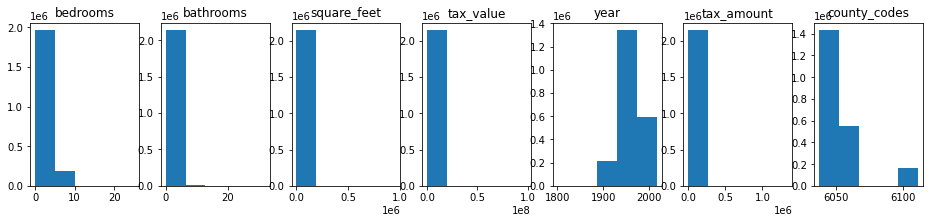

In [4]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'year', 'tax_amount', 'county_codes']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

In [5]:
#remove outliers. Deals with the 0 counts for bath and bedrooms annd tax values 
df = wrangle.remove_outliers(df, 1.5, ['bedrooms', 'bathrooms', 'tax_value', 'square_feet', 'tax_amount'])
df.head()

,bedrooms,bathrooms,square_feet,tax_value,year,tax_amount,county_codes
6,3,4,1620,847770,2011,10244,6037
7,3,2,2077,646760,1926,7924,6037
18,3,1,1244,169471,1950,2532,6037
19,3,2,1300,233266,1950,3110,6037
20,3,2,1222,290492,1951,3870,6037


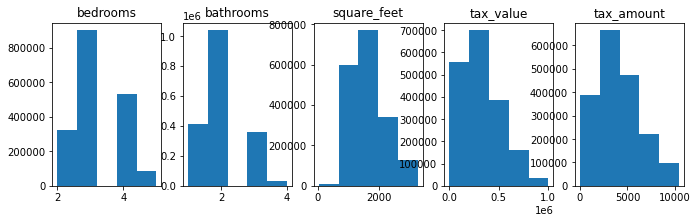

In [6]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['bedrooms', 'bathrooms', 'square_feet', 'tax_value', 'tax_amount']

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1,7, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)

# Code used to prepare data used in the wrangle module
- Refer to consolidated takeaways for explanation.

In [ ]:
#count all null
df.isnull().sum()

In [ ]:
#drop duplicates
df = df.drop_duplicates()

In [ ]:
#fillna with mode
df['bedroomcnt'] = df.bedroomcnt.fillna(value = 3)

In [ ]:
#fillna with mode
df['bathroomcnt'] = df.bathroomcnt.fillna(value = 2)

In [ ]:
#fillna with mean
df['calculatedfinishedsquarefeet'] = df.calculatedfinishedsquarefeet.fillna(value = df['calculatedfinishedsquarefeet'].mean())

In [ ]:
#fillna with mode
df['taxvaluedollarcnt'] = df.taxvaluedollarcnt.fillna(value = 45000)

In [ ]:
#fillna with mode
df['yearbuilt'] = df.yearbuilt.fillna(value = 1960)

In [ ]:
#fillna with mean
df['taxamount'] = df.taxamount.fillna(value = df['taxamount'].mean())

In [ ]:
#convert float to int
df = df.astype('int64')
df.head()

In [ ]:
#converts year built and fips 'county_codes' to object as they are categories
convert_dict = {'yearbuilt': object, 'fips': object}
df = df.astype(convert_dict)

In [ ]:
#Rename column names
df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet":"square_feet",
                  "taxvaluedollarcnt":"tax_value", "yearbuilt":"year", "taxamount":"tax_amount", "fips":"county_codes"})
df.head(1)